In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [9]:
df = pd.read_csv("cleaned_data_nofirstword.csv")

In [10]:
df.head()

,Judul
0,mixed reality system pepper ghost system kenda...
1,penjadwalan mata pelajaran metode tabu searchs...
2,push notification websocket
3,sistem informasi manajemen keluhan pelanggan b...
4,metode store and forward hypertext transfer pr...


In [11]:
df.describe()

,Judul
count,6266
unique,6266
top,minat belajar motivasi belajar gaya belajar si...
freq,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6266 entries, 0 to 6265
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Judul   6266 non-null   object
dtypes: object(1)
memory usage: 49.1+ KB


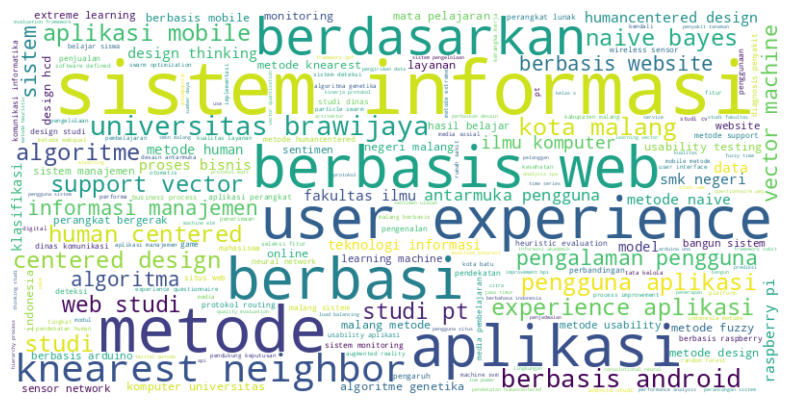

In [13]:
text = " ".join(df["Judul"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
